<h1>selecting a subset of huge data at random using variable count</h1>

In [9]:
import os
import shutil

#using this vairable to count exact no of file we need for the training that is i set to 2000
count           =0
ano_dir         ="data/train/train/"
op_img_dir      ="selected_data/images"
img_dir         ="data/images/images/"
op_ano_dir      ="selected_data/annotation/"

#iterate through the train dir 
for annotaions_name in os.listdir(ano_dir):
    
    #check if count is below 2000 
    if count<2000:
        #variable for annotations path 
        annotations_path = os.path.join(ano_dir,annotaions_name)
        
        #replace xml extension with jpg
        images_name = annotaions_name.replace(".xml",".jpg")
        
        #variable for saving images path
        images_path=os.path.join(img_dir,images_name)

        print(annotations_path,images_path)

        #copying the images to another folder
        if os.path.exists(images_path):
            shutil.copy(images_path, op_img_dir)
        
        #copying the annotations to another folder
        if os.path.exists(annotations_path):
            shutil.copy(annotations_path, op_ano_dir)

        count=count+1
    else:
        break

data/train/train/PMC1064074_table_0.xml data/images/images/PMC1064074_table_0.jpg
data/train/train/PMC1064081_table_0.xml data/images/images/PMC1064081_table_0.jpg
data/train/train/PMC1064081_table_1.xml data/images/images/PMC1064081_table_1.jpg
data/train/train/PMC1064081_table_2.xml data/images/images/PMC1064081_table_2.jpg
data/train/train/PMC1064084_table_0.xml data/images/images/PMC1064084_table_0.jpg
data/train/train/PMC1064094_table_0.xml data/images/images/PMC1064094_table_0.jpg
data/train/train/PMC1064094_table_1.xml data/images/images/PMC1064094_table_1.jpg
data/train/train/PMC1064094_table_2.xml data/images/images/PMC1064094_table_2.jpg
data/train/train/PMC1064095_table_0.xml data/images/images/PMC1064095_table_0.jpg
data/train/train/PMC1064095_table_1.xml data/images/images/PMC1064095_table_1.jpg
data/train/train/PMC1064095_table_2.xml data/images/images/PMC1064095_table_2.jpg
data/train/train/PMC1064095_table_3.xml data/images/images/PMC1064095_table_3.jpg
data/train/train

<h1>Padding resizeing and xml manipulation  depricated </h1>

In [11]:
op_img_dir      ="selected_data/images"
op_ano_dir      ="selected_data/annotation/"

import cv2
import xml.etree.ElementTree as ET
import os
import shutil

desired_size    = 512 
output_img      = "selected_data/processed_images/"
output_ano      = "selected_data/processed_anotations/"

# iterate through the input directory
for image_file in os.listdir(op_img_dir):
    if image_file.endswith(".jpg"):
        
        #saving the path to image
        image_path = os.path.join(op_img_dir, image_file)
        
        # reading the images
        img = cv2.imread(image_path)

        # resize the image while preserving aspect ratio and adding padding
        height, width   =   img.shape[:2]
        max_dim         =   max(height, width)
        ratio           =   int(desired_size) / max_dim
        new_size        =   tuple([int(x * ratio) for x in (width, height)])
        resized_img     =   cv2.resize(img, (new_size[0], new_size[1]))

        # adding pad to the image to get consistent shape
        pad_w           =   desired_size - new_size[0]
        pad_h           =   desired_size - new_size[1]
        top, bottom     =   pad_h // 2, pad_h - (pad_h // 2)
        left, right     =   pad_w // 2, pad_w - (pad_w // 2)
        padded_img      =   cv2.copyMakeBorder(resized_img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

        # save the padded image
        output_image_path = os.path.join(output_img,  image_file)
        cv2.imwrite(output_image_path, padded_img)

        # update the corresponding annotation XML file
        annotation_file = image_file.replace(".jpg", ".xml")
        annotation_path = os.path.join(op_ano_dir, annotation_file)
        output_annotation_path = os.path.join(output_ano, annotation_file)

        if os.path.exists(annotation_path):
            tree = ET.parse(annotation_path)
            root = tree.getroot()

            # Update the size element
            size_elem = root.find("size")
            size_elem.find("width").text = str(desired_size)
            size_elem.find("height").text = str(desired_size)

            # Update the coordinates of the objects in the annotation
            for obj_elem in root.iter("object"):
                bbox = obj_elem.find("bndbox")
                xmin = float(bbox.find("xmin").text)
                ymin = float(bbox.find("ymin").text)
                xmax = float(bbox.find("xmax").text)
                ymax = float(bbox.find("ymax").text)

                # Adjust the coordinates based on the resizing and padding
                xmin = float((xmin * ratio) + left)
                ymin = float((ymin * ratio) + top)
                xmax = float((xmax * ratio) + left)
                ymax = float((ymax * ratio) + top)

                # Update the bounding box coordinates
                bbox.find("xmin").text = str(xmin)
                bbox.find("ymin").text = str(ymin)
                bbox.find("xmax").text = str(xmax)
                bbox.find("ymax").text = str(ymax)

            # Save the updated annotation XML file
            tree.write(output_annotation_path)
        else:
            print(f"Annotation file not found for image: {image_file}")
    print(f"Processed: {image_file}")

print("Resizing and annotation update complete.")

Processed: PMC1064074_table_0.jpg
Processed: PMC1064080_table_0.jpg
Processed: PMC1064081_table_0.jpg
Processed: PMC1064081_table_1.jpg
Processed: PMC1064081_table_2.jpg
Processed: PMC1064084_table_0.jpg
Processed: PMC1064094_table_0.jpg
Processed: PMC1064094_table_1.jpg
Processed: PMC1064094_table_2.jpg
Processed: PMC1064095_table_0.jpg
Processed: PMC1064095_table_1.jpg
Processed: PMC1064095_table_2.jpg
Processed: PMC1064095_table_3.jpg
Processed: PMC1064097_table_0.jpg
Processed: PMC1064097_table_1.jpg
Processed: PMC1064097_table_2.jpg
Processed: PMC1064097_table_3.jpg
Processed: PMC1064100_table_0.jpg
Processed: PMC1064100_table_1.jpg
Processed: PMC1064100_table_2.jpg
Processed: PMC1064100_table_3.jpg
Processed: PMC1064100_table_4.jpg
Processed: PMC1064101_table_0.jpg
Processed: PMC1064101_table_1.jpg
Processed: PMC1064101_table_2.jpg
Processed: PMC1064102_table_0.jpg
Processed: PMC1064102_table_1.jpg
Processed: PMC1064102_table_2.jpg
Processed: PMC1064108_table_0.jpg
Processed: PMC

<h1> describing the unique classes withing the dataset </h1>

In [10]:
gg="table"
hh="table column header"
ii="table row"
jj="table projected row header"
kk="table spanning cell"
ll="table column"

<h1>creating the annotations for each table image    depricated  </h1>

In [18]:
import os
import glob
import xml.etree.ElementTree as ET
import numpy as np

xml_folder="selected_data/processed_anotations/"
png_ano="selected_data/png_ano"

# Create the output PNG folder if it doesn't exist
if not os.path.exists(png_ano):
    os.makedirs(png_ano)


for xml_file in os.listdir(xml_folder):
    if image_file.endswith(".jpg"):

        path=os.path.join(xml_folder,xml_file)

        # Load the XML file
        tree = ET.parse(path)
        root = tree.getroot()

        # Get the image filename from the XML file
        image_filename = root.find("filename").text

        # Create an empty image with the same size
        width, height = 512, 512
        image = np.full((height, width), 0, dtype=np.uint8)  # Initialize with 0 (representing background)

        # Iterate over all object annotations
        for obj in root.findall("object"):
            # Get the object label
            label = obj.find("name").text
        
            # Get the bounding box coordinates
            bbox = obj.find("bndbox")
            xmin = int(float(bbox.find("xmin").text))
            ymin = int(float(bbox.find("ymin").text))
            xmax = int(float(bbox.find("xmax").text))
            ymax = int(float(bbox.find("ymax").text))
            print(xmin, ymin, xmax, ymax, xml_file)

            if label==kk:           
                image[ymin:ymax, xmin:xmax] = 255
    
        # Save the image in PNG format
        temp=os.path.join(png_ano,image_filename[:-4] + ".png")
        cv2.imencode('.png', image)[1].tofile(temp)
    

29 226 481 284 PMC1064074_table_0.xml
29 226 481 239 PMC1064074_table_0.xml
29 226 481 239 PMC1064074_table_0.xml
29 239 481 255 PMC1064074_table_0.xml
29 255 481 270 PMC1064074_table_0.xml
29 270 481 284 PMC1064074_table_0.xml
29 226 109 284 PMC1064074_table_0.xml
109 226 202 284 PMC1064074_table_0.xml
202 226 304 284 PMC1064074_table_0.xml
304 226 404 284 PMC1064074_table_0.xml
404 226 481 284 PMC1064074_table_0.xml
28 172 481 338 PMC1064080_table_0.xml
28 172 88 203 PMC1064080_table_0.xml
88 172 209 185 PMC1064080_table_0.xml
209 172 351 185 PMC1064080_table_0.xml
351 172 418 203 PMC1064080_table_0.xml
418 172 481 203 PMC1064080_table_0.xml
28 203 481 219 PMC1064080_table_0.xml
28 250 481 265 PMC1064080_table_0.xml
28 295 481 310 PMC1064080_table_0.xml
28 172 481 203 PMC1064080_table_0.xml
28 172 481 185 PMC1064080_table_0.xml
28 185 481 203 PMC1064080_table_0.xml
28 203 481 219 PMC1064080_table_0.xml
28 219 481 235 PMC1064080_table_0.xml
28 235 481 250 PMC1064080_table_0.xml
28 250

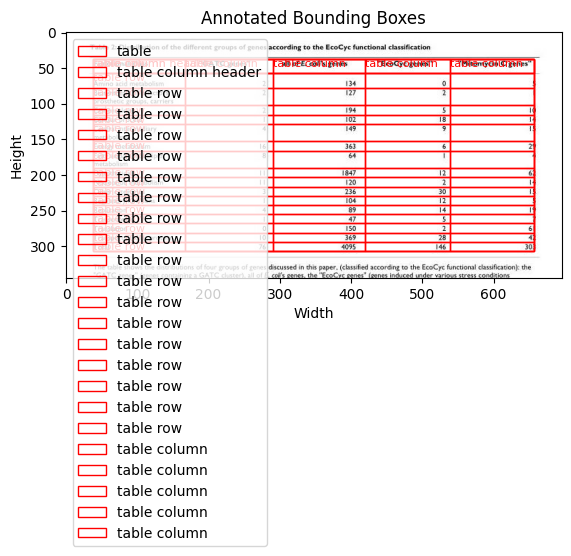

In [2]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_annotations(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    image_path = root.find('path').text
    image_width = int(root.find('size/width').text)
    image_height = int(root.find('size/height').text)

    fig, ax = plt.subplots(1)
    ax.set_aspect('equal')
    ax.imshow(plt.imread(image_path))

    for obj in root.findall('object'):
        obj_name = obj.find('name').text
        xmin = float(obj.find('bndbox/xmin').text)
        ymin = float(obj.find('bndbox/ymin').text)
        xmax = float(obj.find('bndbox/xmax').text)
        ymax = float(obj.find('bndbox/ymax').text)

        rect = patches.Rectangle(
            (xmin, ymin),
            xmax - xmin,
            ymax - ymin,
            linewidth=1,
            edgecolor='r',
            facecolor='none',
            label=obj_name
        )
        ax.add_patch(rect)
        ax.text(xmin, ymin, obj_name, fontsize=8, color='r', verticalalignment='top')

    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.title('Annotated Bounding Boxes')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    xml_file_path = 'PMC493266_table_0.xml'
    visualize_annotations(xml_file_path)


<h1>code for simple conversion of the xml to png format sample depricated


In [9]:
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw

def convert_to_png_with_annotations(xml_file, output_png):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    image_path = root.find('path').text
    image_width = int(root.find('size/width').text)
    image_height = int(root.find('size/height').text)

    img = Image.open(image_path)
    draw = ImageDraw.Draw(img)

    for obj in root.findall('object'):
        xmin = int(float(obj.find('bndbox/xmin').text))
        ymin = int(float(obj.find('bndbox/ymin').text))
        xmax = int(float(obj.find('bndbox/xmax').text))
        ymax = int(float(obj.find('bndbox/ymax').text))

        draw.rectangle([xmin, ymin, xmax, ymax], outline='red')

    img.save(output_png)


<h1>list of annotation containing table projected row header 

In [5]:
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw
import cv2
import os
import numpy as np

root_xml="data/train/train/"
count=0
for xml_file in os.listdir(root_xml):
    if xml_file.endswith(".xml"):
        
        path=os.path.join(root_xml,xml_file)
        tree = ET.parse(path)
        root = tree.getroot()
        for obj in root.findall("object"):
            # Get the object label
            label = obj.find("name").text
            if label==jj:
                count=count+1
                if count==2:
                    print(path)
            else:
                continue

data/train/train/PMC1064080_table_0.xml


KeyboardInterrupt: 

<h1>stage 1 for table row only</h1>

In [32]:
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw
import cv2
import os
import numpy as np

xml_folder="selected_data/annotation/"
png_ano="selected_data/png_ano_stage1"

for xml_file in os.listdir(xml_folder):
    if xml_file.endswith(".xml"):
        
        path=os.path.join(xml_folder,xml_file)
        print(path)
        tree = ET.parse(path)
        root = tree.getroot()
        
        # Get the image filename from the XML file
        image_filename = root.find("filename").text

        #find the dimentions 
        for size_elem in root.iter('size'):
            width = int(size_elem.find('width').text)
            height = int(size_elem.find('height').text)

        # Create an empty image with the same size
        image = np.full((height, width), 0, dtype=np.uint8)  # Initialize with 0 (representing background)

        # Apply uniform reduction of 4 pixels to the bounding boxes
        pixels_to_reduce = 2

        for obj in root.findall("object"):
            # Get the object label
            label = obj.find("name").text

            # Get the bounding box coordinates
            bbox = obj.find("bndbox")
            xmin = int(float(bbox.find("xmin").text)) + pixels_to_reduce
            ymin = int(float(bbox.find("ymin").text)) + pixels_to_reduce
            xmax = int(float(bbox.find("xmax").text)) - pixels_to_reduce
            ymax = int(float(bbox.find("ymax").text)) - pixels_to_reduce
            
            if label==ii:           
                image[ymin:ymax, xmin:xmax] = 255
            
        # Save the image in PNG format
        temp=os.path.join(png_ano,image_filename[:-4] + ".png")
        cv2.imencode('.png', image)[1].tofile(temp)
        

selected_data/annotation/PMC1064074_table_0.xml
selected_data/annotation/PMC1064081_table_0.xml
selected_data/annotation/PMC1064081_table_1.xml
selected_data/annotation/PMC1064081_table_2.xml
selected_data/annotation/PMC1064084_table_0.xml
selected_data/annotation/PMC1064094_table_0.xml
selected_data/annotation/PMC1064094_table_1.xml
selected_data/annotation/PMC1064094_table_2.xml
selected_data/annotation/PMC1064095_table_0.xml
selected_data/annotation/PMC1064095_table_1.xml
selected_data/annotation/PMC1064095_table_2.xml
selected_data/annotation/PMC1064095_table_3.xml
selected_data/annotation/PMC1064097_table_0.xml
selected_data/annotation/PMC1064097_table_1.xml
selected_data/annotation/PMC1064097_table_2.xml
selected_data/annotation/PMC1064097_table_3.xml
selected_data/annotation/PMC1064100_table_0.xml
selected_data/annotation/PMC1064100_table_1.xml
selected_data/annotation/PMC1064100_table_2.xml
selected_data/annotation/PMC1064100_table_3.xml
selected_data/annotation/PMC1064100_tabl

<h1>Stage2 for table column header</h1>

In [33]:
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw
import cv2
import os
import numpy as np

xml_folder="selected_data/annotation/"
png_ano="selected_data/png_ano_stage2"
stage1_ano="selected_data/png_ano_stage1"
count=0
for xml_file in os.listdir(xml_folder):
    if xml_file.endswith(".xml"):
        
        #read the xml file 
        path=os.path.join(xml_folder,xml_file)
        print(path)
        tree = ET.parse(path)
        root = tree.getroot()

        # Get the image filename from the XML file
        image_filename = root.find("filename").text
        image_filename = image_filename.replace(".jpg", ".png")
        png_path=os.path.join(stage1_ano,image_filename)

        #load back previously created png anno images
        image_encoded = np.fromfile(png_path, dtype=np.uint8)

        # Decode the image using cv2.imdecode
        image_decoded = cv2.imdecode(image_encoded, cv2.IMREAD_UNCHANGED)
        
        #print(image_decoded)
        #count=count+1
        #if count>1:
        #    break

        # Apply uniform reduction of 4 pixels to the bounding boxes
        pixels_to_reduce = 2

        for obj in root.findall("object"):
            # Get the object label
            label = obj.find("name").text

            # Get the bounding box coordinates
            bbox = obj.find("bndbox")
            xmin = int(float(bbox.find("xmin").text)) + pixels_to_reduce
            ymin = int(float(bbox.find("ymin").text)) + pixels_to_reduce
            xmax = int(float(bbox.find("xmax").text)) - pixels_to_reduce
            ymax = int(float(bbox.find("ymax").text)) - pixels_to_reduce

            if label==hh:           
                image_decoded[ymin:ymax, xmin:xmax] = 180
            
        # Save the image in PNG format
        temp=os.path.join(png_ano,image_filename[:-4] + ".png")
        cv2.imencode('.png', image_decoded)[1].tofile(temp)
        

selected_data/annotation/PMC1064074_table_0.xml
selected_data/annotation/PMC1064081_table_0.xml
selected_data/annotation/PMC1064081_table_1.xml
selected_data/annotation/PMC1064081_table_2.xml
selected_data/annotation/PMC1064084_table_0.xml
selected_data/annotation/PMC1064094_table_0.xml
selected_data/annotation/PMC1064094_table_1.xml
selected_data/annotation/PMC1064094_table_2.xml
selected_data/annotation/PMC1064095_table_0.xml
selected_data/annotation/PMC1064095_table_1.xml
selected_data/annotation/PMC1064095_table_2.xml
selected_data/annotation/PMC1064095_table_3.xml
selected_data/annotation/PMC1064097_table_0.xml
selected_data/annotation/PMC1064097_table_1.xml
selected_data/annotation/PMC1064097_table_2.xml
selected_data/annotation/PMC1064097_table_3.xml
selected_data/annotation/PMC1064100_table_0.xml
selected_data/annotation/PMC1064100_table_1.xml
selected_data/annotation/PMC1064100_table_2.xml
selected_data/annotation/PMC1064100_table_3.xml
selected_data/annotation/PMC1064100_tabl

<h1>stage 3 for table projected row header</h1>

In [34]:
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw
import cv2
import os
import numpy as np

xml_folder="selected_data/annotation/"
png_ano="selected_data/png_ano_stage3"
stage1_ano="selected_data/png_ano_stage2"
count=0
for xml_file in os.listdir(xml_folder):
    if xml_file.endswith(".xml"):
        
        #read the xml file 
        path=os.path.join(xml_folder,xml_file)
        print(path)
        tree = ET.parse(path)
        root = tree.getroot()

        # Get the image filename from the XML file
        image_filename = root.find("filename").text
        image_filename = image_filename.replace(".jpg", ".png")
        png_path=os.path.join(stage1_ano,image_filename)

        #load back previously created png anno images
        image_encoded = np.fromfile(png_path, dtype=np.uint8)

        # Decode the image using cv2.imdecode
        image_decoded = cv2.imdecode(image_encoded, cv2.IMREAD_UNCHANGED)
        
        #print(image_decoded)
        #count=count+1
        #if count>1:
        #    break

        # Apply uniform reduction of 4 pixels to the bounding boxes
        pixels_to_reduce = 2

        for obj in root.findall("object"):
            # Get the object label
            label = obj.find("name").text

            # Get the bounding box coordinates
            bbox = obj.find("bndbox")
            xmin = int(float(bbox.find("xmin").text)) + pixels_to_reduce
            ymin = int(float(bbox.find("ymin").text)) + pixels_to_reduce
            xmax = int(float(bbox.find("xmax").text)) - pixels_to_reduce
            ymax = int(float(bbox.find("ymax").text)) - pixels_to_reduce

            if label==jj:           
                image_decoded[ymin:ymax, xmin:xmax] = 120
            
        # Save the image in PNG format
        temp=os.path.join(png_ano,image_filename[:-4] + ".png")
        cv2.imencode('.png', image_decoded)[1].tofile(temp)
        

selected_data/annotation/PMC1064074_table_0.xml
selected_data/annotation/PMC1064081_table_0.xml
selected_data/annotation/PMC1064081_table_1.xml
selected_data/annotation/PMC1064081_table_2.xml
selected_data/annotation/PMC1064084_table_0.xml
selected_data/annotation/PMC1064094_table_0.xml
selected_data/annotation/PMC1064094_table_1.xml
selected_data/annotation/PMC1064094_table_2.xml
selected_data/annotation/PMC1064095_table_0.xml
selected_data/annotation/PMC1064095_table_1.xml
selected_data/annotation/PMC1064095_table_2.xml
selected_data/annotation/PMC1064095_table_3.xml
selected_data/annotation/PMC1064097_table_0.xml
selected_data/annotation/PMC1064097_table_1.xml
selected_data/annotation/PMC1064097_table_2.xml
selected_data/annotation/PMC1064097_table_3.xml
selected_data/annotation/PMC1064100_table_0.xml
selected_data/annotation/PMC1064100_table_1.xml
selected_data/annotation/PMC1064100_table_2.xml
selected_data/annotation/PMC1064100_table_3.xml
selected_data/annotation/PMC1064100_tabl

<h1>stage 4 for table spanning cell</h1>

In [35]:
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw
import cv2
import os
import numpy as np

xml_folder="selected_data/annotation/"
png_ano="selected_data/png_ano_stage4"
stage1_ano="selected_data/png_ano_stage3"
count=0
for xml_file in os.listdir(xml_folder):
    if xml_file.endswith(".xml"):
        
        #read the xml file 
        path=os.path.join(xml_folder,xml_file)
        print(path)
        tree = ET.parse(path)
        root = tree.getroot()

        # Get the image filename from the XML file
        image_filename = root.find("filename").text
        image_filename = image_filename.replace(".jpg", ".png")
        png_path=os.path.join(stage1_ano,image_filename)

        #load back previously created png anno images
        image_encoded = np.fromfile(png_path, dtype=np.uint8)

        # Decode the image using cv2.imdecode
        image_decoded = cv2.imdecode(image_encoded, cv2.IMREAD_UNCHANGED)
        
        #print(image_decoded)
        #count=count+1
        #if count>1:
        #    break

        # Apply uniform reduction of 4 pixels to the bounding boxes
        pixels_to_reduce = 2

        for obj in root.findall("object"):
            # Get the object label
            label = obj.find("name").text

            # Get the bounding box coordinates
            bbox = obj.find("bndbox")
            xmin = int(float(bbox.find("xmin").text)) + pixels_to_reduce
            ymin = int(float(bbox.find("ymin").text)) + pixels_to_reduce
            xmax = int(float(bbox.find("xmax").text)) - pixels_to_reduce
            ymax = int(float(bbox.find("ymax").text)) - pixels_to_reduce

            if label==kk:           
                image_decoded[ymin:ymax, xmin:xmax] = 60
            
        # Save the image in PNG format
        temp=os.path.join(png_ano,image_filename[:-4] + ".png")
        cv2.imencode('.png', image_decoded)[1].tofile(temp)
        

selected_data/annotation/PMC1064074_table_0.xml
selected_data/annotation/PMC1064081_table_0.xml
selected_data/annotation/PMC1064081_table_1.xml
selected_data/annotation/PMC1064081_table_2.xml
selected_data/annotation/PMC1064084_table_0.xml
selected_data/annotation/PMC1064094_table_0.xml
selected_data/annotation/PMC1064094_table_1.xml
selected_data/annotation/PMC1064094_table_2.xml
selected_data/annotation/PMC1064095_table_0.xml
selected_data/annotation/PMC1064095_table_1.xml
selected_data/annotation/PMC1064095_table_2.xml
selected_data/annotation/PMC1064095_table_3.xml
selected_data/annotation/PMC1064097_table_0.xml
selected_data/annotation/PMC1064097_table_1.xml
selected_data/annotation/PMC1064097_table_2.xml
selected_data/annotation/PMC1064097_table_3.xml
selected_data/annotation/PMC1064100_table_0.xml
selected_data/annotation/PMC1064100_table_1.xml
selected_data/annotation/PMC1064100_table_2.xml
selected_data/annotation/PMC1064100_table_3.xml
selected_data/annotation/PMC1064100_tabl

<h1>Stage 5 for table column not ready for the moment it will require individual model to detect </h1>

In [36]:
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw
import cv2
import os
import numpy as np

xml_folder="selected_data/annotation/"
png_ano="selected_data/png_ano_stage5"
stage1_ano="selected_data/png_ano_stage4"
count=0
for xml_file in os.listdir(xml_folder):
    if xml_file.endswith(".xml"):
        
        #read the xml file 
        path=os.path.join(xml_folder,xml_file)
        print(path)
        tree = ET.parse(path)
        root = tree.getroot()

        # Get the image filename from the XML file
        image_filename = root.find("filename").text
        image_filename = image_filename.replace(".jpg", ".png")
        png_path=os.path.join(stage1_ano,image_filename)

        #load back previously created png anno images
        image_encoded = np.fromfile(png_path, dtype=np.uint8)

        # Decode the image using cv2.imdecode
        image_decoded = cv2.imdecode(image_encoded, cv2.IMREAD_UNCHANGED)
        
        #print(image_decoded)
        #count=count+1
        #if count>1:
        #    break

        # Apply uniform reduction of 4 pixels to the bounding boxes
        pixels_to_reduce = 2

        for obj in root.findall("object"):
            # Get the object label
            label = obj.find("name").text

            # Get the bounding box coordinates
            bbox = obj.find("bndbox")
            xmin = int(float(bbox.find("xmin").text)) + pixels_to_reduce
            ymin = int(float(bbox.find("ymin").text)) + pixels_to_reduce
            xmax = int(float(bbox.find("xmax").text)) - pixels_to_reduce
            ymax = int(float(bbox.find("ymax").text)) - pixels_to_reduce

            if label==ll:           
                image_decoded[ymin:ymax, xmin:xmax] = 30
            
        # Save the image in PNG format
        temp=os.path.join(png_ano,image_filename[:-4] + ".png")
        cv2.imencode('.png', image_decoded)[1].tofile(temp)
        

selected_data/annotation/PMC1064074_table_0.xml
selected_data/annotation/PMC1064081_table_0.xml
selected_data/annotation/PMC1064081_table_1.xml
selected_data/annotation/PMC1064081_table_2.xml
selected_data/annotation/PMC1064084_table_0.xml
selected_data/annotation/PMC1064094_table_0.xml
selected_data/annotation/PMC1064094_table_1.xml
selected_data/annotation/PMC1064094_table_2.xml
selected_data/annotation/PMC1064095_table_0.xml
selected_data/annotation/PMC1064095_table_1.xml
selected_data/annotation/PMC1064095_table_2.xml
selected_data/annotation/PMC1064095_table_3.xml
selected_data/annotation/PMC1064097_table_0.xml
selected_data/annotation/PMC1064097_table_1.xml
selected_data/annotation/PMC1064097_table_2.xml
selected_data/annotation/PMC1064097_table_3.xml
selected_data/annotation/PMC1064100_table_0.xml
selected_data/annotation/PMC1064100_table_1.xml
selected_data/annotation/PMC1064100_table_2.xml
selected_data/annotation/PMC1064100_table_3.xml
selected_data/annotation/PMC1064100_tabl

In [58]:

        
#load back previously created png anno images
image_encoded = np.fromfile("PMC1064081_table_2.png", dtype=np.uint8)
# Decode the image using cv2.imdecode
image_decoded = cv2.imdecode(image_encoded, cv2.IMREAD_UNCHANGED)
print(image_decoded.shape)
np.set_printoptions(threshold=np.inf)
print(image_decoded[2][4])


(685, 689)
0


In [3]:
import os
import numpy as np
import cv2

#stage4 images path
processed_ano="selected_data/png_ano_stage4/"
output_folder="selected_data/png_ano"
for png_ano in os.listdir(processed_ano):
    if png_ano.endswith(".png"):

        path=os.path.join(processed_ano,png_ano)
        print(path)
        #load back previously created png anno images
        image_encoded = np.fromfile(path, dtype=np.uint8)

        # Decode the image using cv2.imdecode
        image_decoded = cv2.imdecode(image_encoded, cv2.IMREAD_UNCHANGED)
        print(image_decoded.shape)
        # Find the height and width of the image_decoded
        height, width = image_decoded.shape[:2]
        
        # Create an empty image with the same size
        image = np.full((height, width), 0, dtype=np.uint8)  # Initialize with 0 (representing background)
        
        row=0
        col=0
        # Update the image based on the target colors
        for i in image_decoded:
            col=col+1
            row=0
            for j in i:
                row=row+1
                if j==255:
                    image[col][row]=4
                elif j==180:
                    image[col][row]=3
                elif j==120:
                    image[col][row]=2
                elif j==60:
                    image[col][row]=1
        # Save the image in PNG format
        temp=os.path.join(output_folder,png_ano[:-4] + ".png")
        cv2.imencode('.png', image)[1].tofile(temp)     

selected_data/png_ano_stage4/PMC1064074_table_0.png
(149, 643)
selected_data/png_ano_stage4/PMC1064081_table_0.png
(314, 688)
selected_data/png_ano_stage4/PMC1064081_table_1.png
(309, 700)
selected_data/png_ano_stage4/PMC1064081_table_2.png
(685, 689)
selected_data/png_ano_stage4/PMC1064084_table_0.png
(480, 324)
selected_data/png_ano_stage4/PMC1064094_table_0.png
(323, 661)
selected_data/png_ano_stage4/PMC1064094_table_1.png
(177, 688)
selected_data/png_ano_stage4/PMC1064094_table_2.png
(359, 698)
selected_data/png_ano_stage4/PMC1064095_table_0.png
(377, 692)
selected_data/png_ano_stage4/PMC1064095_table_1.png
(209, 687)
selected_data/png_ano_stage4/PMC1064095_table_2.png
(209, 689)
selected_data/png_ano_stage4/PMC1064095_table_3.png
(209, 689)
selected_data/png_ano_stage4/PMC1064097_table_0.png
(226, 688)
selected_data/png_ano_stage4/PMC1064097_table_1.png
(760, 703)
selected_data/png_ano_stage4/PMC1064097_table_2.png
(222, 691)
selected_data/png_ano_stage4/PMC1064097_table_3.png
(21

In [6]:
import os 
import cv2
root_img="selected_data/images"
root_ano="selected_data/png_ano"
output_img="selected_data/processed_images"
output_ano="selected_data/processed_anotations"

desired_size=512

# iterate through the input directory

for image_file in os.listdir(root_img):
    if image_file.endswith(".jpg"):
        
        #saving the path to image
        image_path = os.path.join(root_img, image_file)
        print(image_path)

        # reading the images
        img = cv2.imread(image_path)

        # resize the image while preserving aspect ratio and adding padding
        height, width   =   img.shape[:2]
        max_dim         =   max(height, width)
        ratio           =   int(desired_size) / max_dim
        new_size        =   tuple([int(x * ratio) for x in (width, height)])
        resized_img     =   cv2.resize(img, (new_size[0], new_size[1]))

        # adding pad to the image to get consistent shape
        pad_w           =   desired_size - new_size[0]
        pad_h           =   desired_size - new_size[1]
        top, bottom     =   pad_h // 2, pad_h - (pad_h // 2)
        left, right     =   pad_w // 2, pad_w - (pad_w // 2)
        padded_img      =   cv2.copyMakeBorder(resized_img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

        # save the padded image
        output_image_path = os.path.join(output_img,  image_file)
        cv2.imwrite(output_image_path, padded_img)

        #loading mask file to add padding 
        mask_file=image_file.replace(".jpg",".png")
        mask_path = os.path.join(root_ano,mask_file)

        mask=cv2.imread(mask_path)

        # resize the image while preserving aspect ratio and adding padding
        height, width   =   mask.shape[:2]
        max_dim         =   max(height, width)
        ratio           =   int(desired_size) / max_dim
        new_size        =   tuple([int(x * ratio) for x in (width, height)])
        resized_mask     =   cv2.resize(mask, (new_size[0], new_size[1]))

        # adding pad to the image to get consistent shape
        pad_w           =   desired_size - new_size[0]
        pad_h           =   desired_size - new_size[1]
        top, bottom     =   pad_h // 2, pad_h - (pad_h // 2)
        left, right     =   pad_w // 2, pad_w - (pad_w // 2)
        padded_mask      =   cv2.copyMakeBorder(resized_mask, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

        # save the padded image
        output_mask_path = os.path.join(output_ano,  mask_file)
        cv2.imwrite(output_mask_path, padded_mask)

selected_data/images\PMC1064074_table_0.jpg
selected_data/images\PMC1064081_table_0.jpg
selected_data/images\PMC1064081_table_1.jpg
selected_data/images\PMC1064081_table_2.jpg
selected_data/images\PMC1064084_table_0.jpg
selected_data/images\PMC1064094_table_0.jpg
selected_data/images\PMC1064094_table_1.jpg
selected_data/images\PMC1064094_table_2.jpg
selected_data/images\PMC1064095_table_0.jpg
selected_data/images\PMC1064095_table_1.jpg
selected_data/images\PMC1064095_table_2.jpg
selected_data/images\PMC1064095_table_3.jpg
selected_data/images\PMC1064097_table_0.jpg
selected_data/images\PMC1064097_table_1.jpg
selected_data/images\PMC1064097_table_2.jpg
selected_data/images\PMC1064097_table_3.jpg
selected_data/images\PMC1064100_table_0.jpg
selected_data/images\PMC1064100_table_1.jpg
selected_data/images\PMC1064100_table_2.jpg
selected_data/images\PMC1064100_table_3.jpg
selected_data/images\PMC1064100_table_4.jpg
selected_data/images\PMC1064101_table_0.jpg
selected_data/images\PMC1064101_

In [7]:
import random 
import shutil


# set the percentage of images to use for testing
test_pct        =   0.2


# set the root directory for the image data
img_root       =   'selected_data/processed_images'
ano_root       =   'selected_data/processed_anotations'


# set the directories for the train and test data
train_img       =   "train_img"
train_ano       =   "train_ano"
test_img        =   "test_img"
test_ano        =   "test_ano"


# create the train and test directories
if not os.path.exists(train_img):
    os.makedirs(train_img)

if not os.path.exists(train_ano):
    os.makedirs(train_ano)

if not os.path.exists(test_img):
    os.makedirs(test_img)
    
if not os.path.exists(test_ano):
    os.makedirs(test_ano)

In [8]:
# Get the list of image filenames
image_filenames = [filename for filename in os.listdir(img_root) if filename.endswith(".jpg")]

# Calculate the number of images for testing based on the test percentage
num_images = len(image_filenames)
num_test_images = int(num_images * test_pct)

# Randomly select images for testing
test_image_filenames = random.sample(image_filenames, num_test_images)

print(len(test_image_filenames))

400


In [9]:
# Iterate through the image data root directory
for filename in os.listdir(img_root):
    if filename.endswith(".jpg"):
        src_path = os.path.join(img_root, filename)
        annotation_filename = filename.replace(".jpg", ".png")
        src_ano_path = os.path.join(ano_root, annotation_filename)
        
        if filename in test_image_filenames:
            # Move the image to the test directory
            dst_path = os.path.join(test_img, filename)
            dst_ano_path = os.path.join(test_ano, annotation_filename)
        else:
            # Move the image to the train directory
            dst_path = os.path.join(train_img, filename)
            dst_ano_path = os.path.join(train_ano, annotation_filename)
        
        # Move the image and the corresponding annotation file
        shutil.move(src_path, dst_path)
        if os.path.exists(src_ano_path):
            shutil.move(src_ano_path, dst_ano_path)

print("Spliting sucessful!")

Spliting sucessful!


In [7]:
model.train(
    train_images =  "train_img",
    train_annotations = "train_ano",
    checkpoints_path = "checkpoints" , epochs= 50 )

Verifying train dataset


  0%|          | 0/1600 [00:00<?, ?it/s]

100%|██████████| 1600/1600 [00:07<00:00, 214.61it/s]


Dataset verified! 
Starting Epoch  0
512/512 [==============================] - 113s 218ms/step - loss: 1.1790 - accuracy: 0.7106
saved  checkpoints.model.0
Finished Epoch 0
Starting Epoch  1
512/512 [==============================] - 112s 220ms/step - loss: 1.1662 - accuracy: 0.7145
saved  checkpoints.model.1
Finished Epoch 1
Starting Epoch  2
512/512 [==============================] - 113s 220ms/step - loss: 1.1552 - accuracy: 0.7181
saved  checkpoints.model.2
Finished Epoch 2
Starting Epoch  3
512/512 [==============================] - 113s 220ms/step - loss: 1.1524 - accuracy: 0.7152
saved  checkpoints.model.3
Finished Epoch 3
Starting Epoch  4
512/512 [==============================] - 113s 221ms/step - loss: 1.1353 - accuracy: 0.7207
saved  checkpoints.model.4
Finished Epoch 4
Starting Epoch  5
512/512 [==============================] - 113s 221ms/step - loss: 1.1288 - accuracy: 0.7222
saved  checkpoints.model.5
Finished Epoch 5
Starting Epoch  6
512/512 [========================

In [1]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda


################################################################
def multi_unet_model(n_classes=5, IMG_HEIGHT=512, IMG_WIDTH=512, IMG_CHANNELS=1):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    p5 = MaxPooling2D(pool_size=(2, 2))(c5)

    c6 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p5)
    c6 = Dropout(0.3)(c6)
    c6 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
    
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c6)
    u6 = concatenate([u6, c5])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
    
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c4])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
    
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c3])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
    
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c2])
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
    
    u10 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c9)
    u10 = concatenate([u10, c1], axis=3)
    c10 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u10)
    c10 = Dropout(0.1)(c10)
    c10 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c10)

    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c10)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    
    #NOTE: Compile the model in the main program to make it easy to test with various loss functions
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    model.summary()
    
    return model

In [2]:
model = multi_unet_model(n_classes=5, IMG_HEIGHT=512, IMG_WIDTH=512, IMG_CHANNELS=1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 512, 512, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [8]:
import pandas as pd
import os
from keras.preprocessing.image import ImageDataGenerator

CLASS_LABELS = ["Table spanning cell", "Table projected row header", "Table header column", "Table row", "Other"]
batch_size = 64
IMAGE_DIR = "train_img"
MASK_DIR = "train_masks"  # Assuming all mask images are in this directory
TRAIN_DIR = "path_to_train_directory"  # Replace with the actual path to the training directory
TEST_DIR = "path_to_test_directory"  # Replace with the actual path to the test directory

# Define the ImageDataGenerators for training and testing
train_datagen = ImageDataGenerator(...)
test_datagen = ImageDataGenerator(...)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(512, 512),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=False,
    classes=CLASS_LABELS
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(512, 512),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    classes=CLASS_LABELS
)

# Test data generator
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(512, 512),
    batch_size=1,
    class_mode='categorical',
    shuffle=False,
    classes=CLASS_LABELS
)


Found 0 images belonging to 4 classes.
Found 0 images belonging to 4 classes.
Found 0 images belonging to 4 classes.
Found 0 images belonging to 4 classes.
Found 0 images belonging to 4 classes.


In [9]:
from keras.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint("unet_best_weights.h5", monitor='val_loss', save_best_only=True, mode='min', verbose=1)
model.fit(train_generator, train_mask_generator,validation_data=(validation_generator, validation_mask_generator), batch_size=16, epochs=8, callbacks=[checkpoint_callback])

ValueError: `y` argument is not supported when using `keras.utils.Sequence` as input.

In [10]:
import numpy as np
np.set_printoptions(threshold=np.inf)
temp=model.predict_segmentation("PMC1064081_table_1.jpg")

AttributeError: 'Functional' object has no attribute 'predict_segmentation'

In [9]:
import cv2
cv2.imencode('.png', temp)[1].tofile("out.png") 